我想要同时分析以下7个地点的数据。
/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-lanshanzui.csv
/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-tuoshan.csv
/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-乌龟山南.csv
/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-五里湖心.csv
/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-平台山.csv
/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-胥湖心.csv
/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-锡东水厂.csv

# 存储所有地点的数据
all_data = {}
for file in csv_files:
    # 获取地点名称
    location = file.split('/')[-1].replace('001-','').replace('.csv','')
    
    # 将英文地名转换为中文
    if location == 'lanshanzui':
        location = '兰山嘴'
    elif location == 'tuoshan':
        location = '拖山'

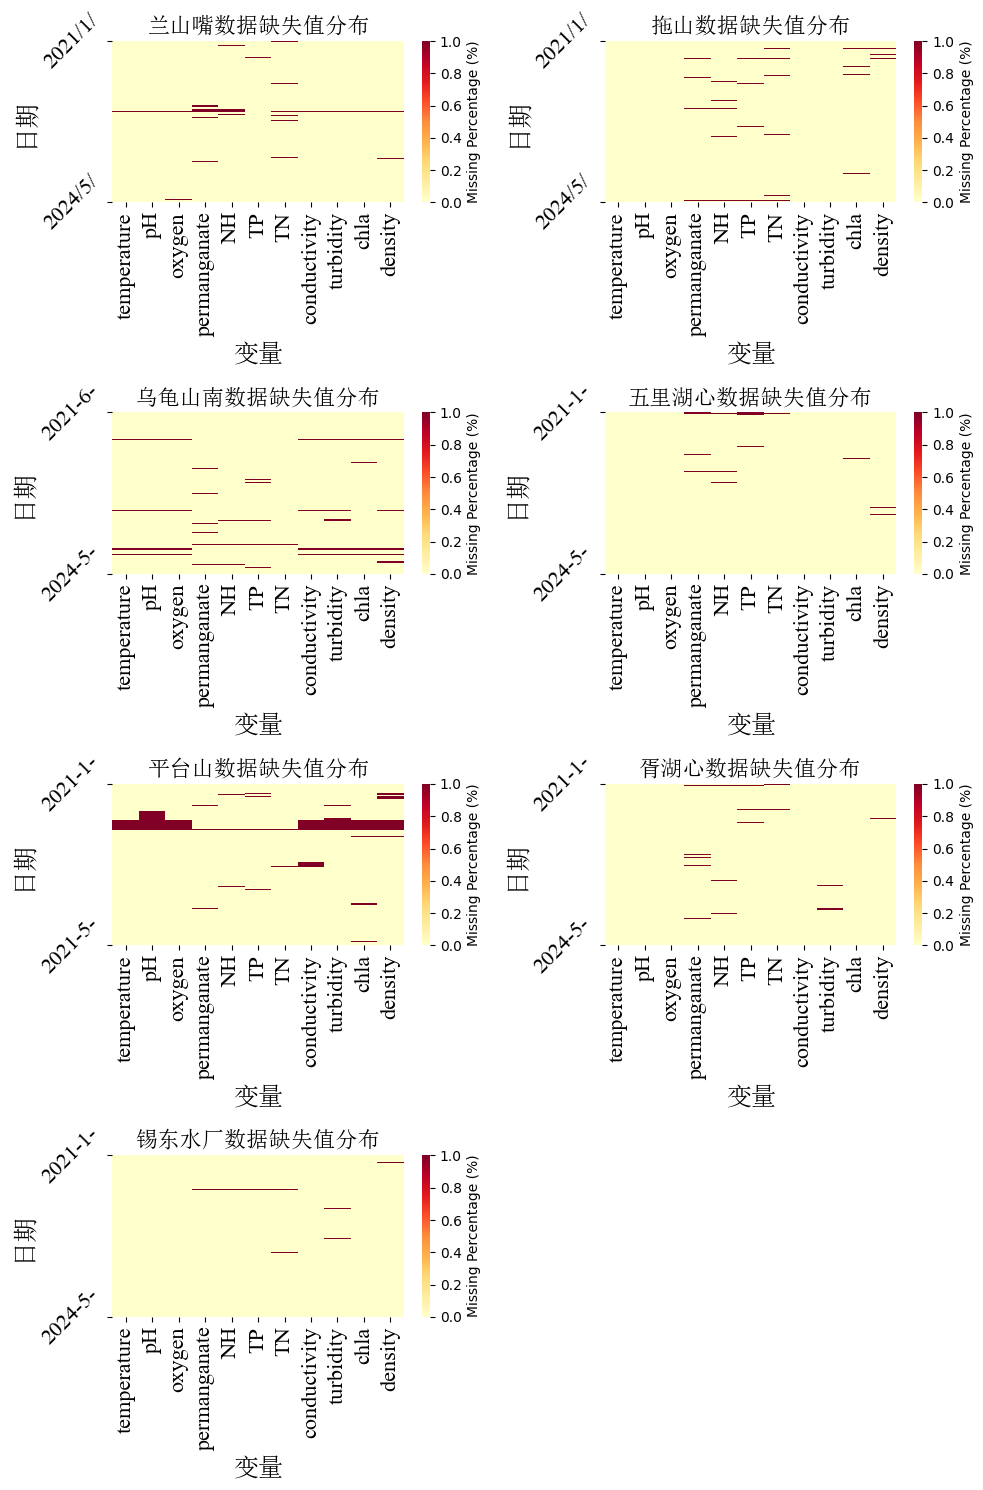

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22068 (\N{CJK UNIFIED IDEOGRAPH-5634}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25302 (\N{CJK UNIFIED IDEOGRAPH-62D6}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

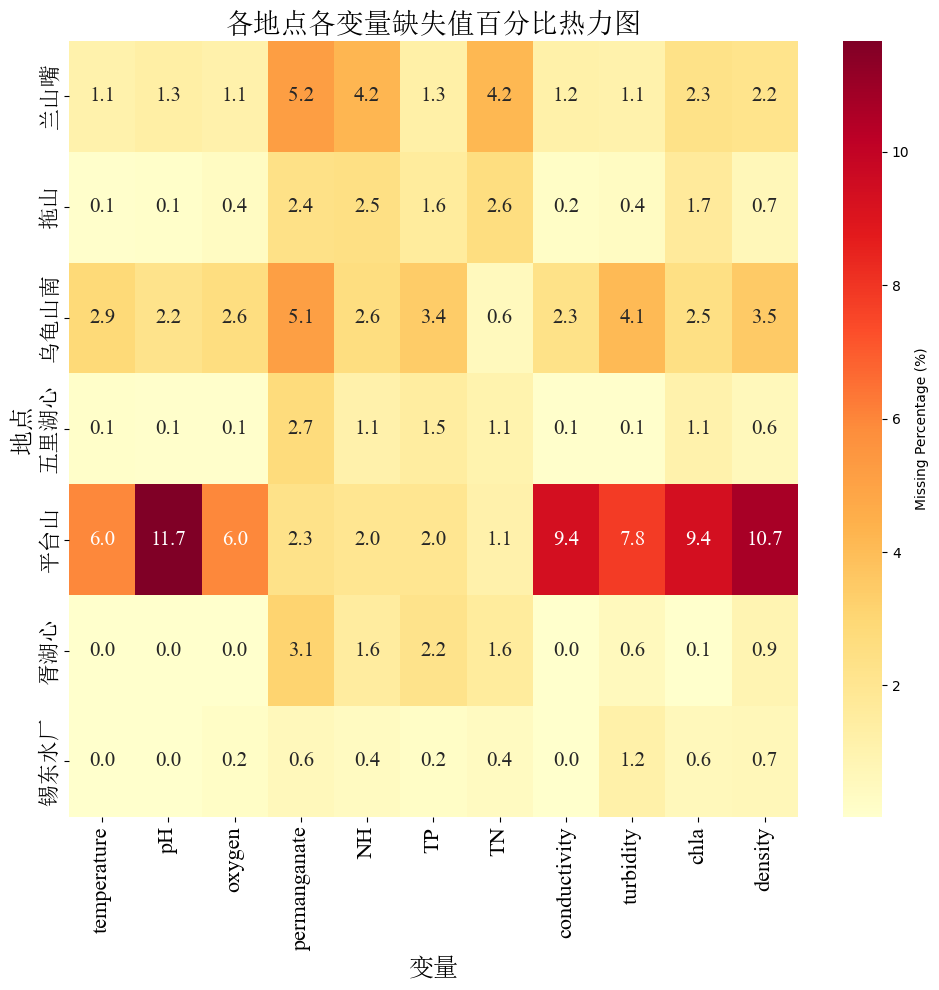

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import chardet 
import pandas as pd

# 读取所有CSV文件
csv_files = [
    '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-lanshanzui.csv',
    '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-tuoshan.csv',
    '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-乌龟山南.csv',
    '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-五里湖心.csv',
    '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-平台山.csv',
    '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-胥湖心.csv',
    '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-锡东水厂.csv'
]

# 存储所有地点的数据
all_data = {}
for file in csv_files:
    # 获取地点名称
    location = file.split('/')[-1].replace('001-','').replace('.csv','')
    
    # 将英文地名转换为中文
    if location == 'lanshanzui':
        location = '兰山嘴'
    elif location == 'tuoshan':
        location = '拖山'
    
    # 检测文件编码并读取
    with open(file, 'rb') as f:
        result = chardet.detect(f.read())
    df = pd.read_csv(file, encoding=result['encoding'])
    
    # 将日期列转换为字符串并截取前7位
    df['date'] = df['date'].astype(str).str[:7]
    
    # 将除date外的负值替换为nan
    columns_to_process = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
                         'conductivity', 'turbidity', 'chla', 'density']
    for col in columns_to_process:
        df.loc[df[col] < 0, col] = np.nan
        
    all_data[location] = df

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=14)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=14)

# 为每个地点创建缺失值热力图
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
axes = axes.ravel()

for idx, (location, df) in enumerate(all_data.items()):
    if idx < 7:  # 只处理7个地点
        missing_data = df.set_index('date')[columns_to_process].isnull()
        # 设置刻度
        date_ticks = [missing_data.index[0], missing_data.index[-1]]
        
        sns.heatmap(missing_data, 
                    cmap='YlOrRd',
                    cbar_kws={'label': 'Missing Percentage (%)'},
                    ax=axes[idx])
        
        axes[idx].set_title(f'{location}数据缺失值分布', fontproperties=chinese_font, fontsize=16)
        axes[idx].set_xlabel('变量', fontproperties=chinese_font, fontsize=18)
        axes[idx].set_ylabel('日期', fontproperties=chinese_font, fontsize=18)
        
        # 设置刻度标签
        axes[idx].set_yticks([0, len(missing_data)-1])
        axes[idx].set_yticklabels(date_ticks, rotation=45)
        
        # 设置字体和字号
        for label in axes[idx].get_xticklabels():
            label.set_fontproperties(english_font)
            label.set_fontsize(16)
        for label in axes[idx].get_yticklabels():
            label.set_fontproperties(english_font)
            label.set_fontsize(16)

# 删除多余的子图
if len(axes) > 7:
    fig.delaxes(axes[7])

plt.tight_layout()
plt.show()

# 计算并展示所有地点的缺失值百分比
plt.figure(figsize=(10, 10))
missing_percentages = pd.DataFrame()

for location, df in all_data.items():
    missing_pct = df[columns_to_process].isnull().sum() * 100 / len(df)
    missing_percentages[location] = missing_pct

sns.heatmap(missing_percentages.T,
            annot=True,
            fmt='.1f',
            cmap='YlOrRd',
            annot_kws={'font_properties': english_font, 'size': 15},
            cbar_kws={'label': 'Missing Percentage (%)'})

plt.title('各地点各变量缺失值百分比热力图', fontproperties=chinese_font, fontsize=20)
plt.xlabel('变量', fontproperties=chinese_font, fontsize=18)
plt.ylabel('地点', fontproperties=chinese_font, fontsize=18)

# 设置字体和字号
ax = plt.gca()
for label in ax.get_xticklabels():
    label.set_fontproperties(english_font)
    label.set_fontsize(16)
for label in ax.get_yticklabels():
    label.set_fontproperties(chinese_font)
    label.set_fontsize(16)

plt.tight_layout()
plt.show()
